In [1]:
# This notebook is linked to the AWSubduction_FraWSC-DHflx.ipynb one 
# It only makes the last part of scatter correlation plots 

In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy
import scipy.stats

%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
def pval_test(rpval,rtresh):
    # The p-value output by the scipy.stats.pearsonr function is to interpreted as follow:
    # It corresponds to the probability to make an error if we reject the H0 hypothesis (or null hypothesis)
    # This function just set a color to either green or red to set a correlation significance
    
    col_val='g' # green color stands for Ok, significative correlation
    if rpval > rtresh : col_val='r'  
    
    return col_val

In [4]:
s_year=1980 ; e_year=2015
RYEAR=str(s_year)+'-'+str(e_year)

In [5]:
# List of GS± experiments names:
case_Ref='BCTGE27NTMX'   #; case_Ref='BVHNTMXP'  ;  case_Ref='BVHNTMXD'  ;  case_Ref='BCTGE27NTMX'  

ralpha=0.05 # Treshold I would like to respect, or 5% confidence 


In [6]:
ds_read=xr.Dataset()
ds_read=xr.open_dataset('NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_Full_LargeFraWSC_TiSe_Quant.nc')

In [7]:
ds_read

<xarray.Dataset>
Dimensions:                      (time: 432)
Coordinates:
  * time                         (time) datetime64[ns] 1980-01-31 ... 2015-12-31
Data variables:
    Ref_Qt_FraWSC_meanTiSe       (time) float64 ...
    Ref_AWTmax_FraWSC_meanTiSe   (time) float64 ...
    Ref_Icearea_FraWSC_meanTiSe  (time) float64 ...
    Ref_massflx_TiSe_nFraWSC     (time) float64 ...
    Ref_SS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_NS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_XS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_SS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_NS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_XS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_FraWSC_S-N_Hflx_ano      (time) float64 ...
    Ref_FraWSC_S-X_Hflx_ano      (time) float64 ...

In [8]:
ds_read_add=xr.Dataset()
ds_read_add=xr.open_dataset('NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_TiSe_NetHeatQt_LargeFraWSC.nc')
ds_read['Ref_Qtdxdy_FraWSC_meanTiSe']=ds_read_add['Ref_Qtdxdy_FraWSC_meanTiSe']

>>>> ## Build winter & summer only time-series to explore  

In [9]:
ds_read_dt=xr.Dataset()
# Let's select JFM & JAS periods 
dates = pd.date_range('1980-01', '2016-01', freq='M')
dates
ds_read_dt['time']=dates
ds_read_dt['Ref_Qt_FraWSC_meanTiSe']=ds_read['Ref_Qt_FraWSC_meanTiSe']
ds_read_dt['Ref_AWTmax_FraWSC_meanTiSe']=ds_read['Ref_AWTmax_FraWSC_meanTiSe']
ds_read_dt['Ref_Icearea_FraWSC_meanTiSe']=ds_read['Ref_Icearea_FraWSC_meanTiSe']
ds_read_dt['Ref_massflx_TiSe_nFraWSC']=ds_read['Ref_massflx_TiSe_nFraWSC']
ds_read_dt['Ref_SS_FraWSC_Hflx_TiSe']=ds_read['Ref_SS_FraWSC_Hflx_TiSe']
ds_read_dt['Ref_XS_FraWSC_Hflx_TiSe']=ds_read['Ref_XS_FraWSC_Hflx_TiSe']
ds_read_dt['Ref_SS_FraWSC_Vol_TiSe']=ds_read['Ref_SS_FraWSC_Vol_TiSe']
ds_read_dt['Ref_XS_FraWSC_Vol_TiSe']=ds_read['Ref_XS_FraWSC_Vol_TiSe']
ds_read_dt['Ref_FraWSC_S-X_Hflx_ano']=ds_read['Ref_FraWSC_S-X_Hflx_ano']


In [10]:
ds_read_dt

<xarray.Dataset>
Dimensions:                      (time: 432)
Coordinates:
  * time                         (time) datetime64[ns] 1980-01-31 ... 2015-12-31
Data variables:
    Ref_Qt_FraWSC_meanTiSe       (time) float64 ...
    Ref_AWTmax_FraWSC_meanTiSe   (time) float64 ...
    Ref_Icearea_FraWSC_meanTiSe  (time) float64 ...
    Ref_massflx_TiSe_nFraWSC     (time) float64 ...
    Ref_SS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_XS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_SS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_XS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_FraWSC_S-X_Hflx_ano      (time) float64 ...

In [11]:
# To perform seasonal mean JFM, AMJ etc ....
# Notice that the date corresponds to the period end.
# For instance for the JFM period, the corresponding date in end of March  
# It has been checked for the frist 3 months that the corresponding mean was correct
dt_read=ds_read_dt.to_dataframe()
dt_SEAS=dt_read.resample('Q-DEC').mean()
dt_SEAS


,Ref_Qt_FraWSC_meanTiSe,Ref_AWTmax_FraWSC_meanTiSe,Ref_Icearea_FraWSC_meanTiSe,Ref_massflx_TiSe_nFraWSC,Ref_SS_FraWSC_Hflx_TiSe,Ref_XS_FraWSC_Hflx_TiSe,Ref_SS_FraWSC_Vol_TiSe,Ref_XS_FraWSC_Vol_TiSe,Ref_FraWSC_S-X_Hflx_ano
time,,,,,,,,,
1980-03-31,-209.487128,2.459621,75.810528,-2.033299e+07,76.114282,13.522379,5.414979,1.757406,62.591903
1980-06-30,-15.028509,2.511897,69.480996,-1.861990e+07,64.388801,16.212211,4.703342,2.396047,48.176590
1980-09-30,6.966147,3.711395,42.942719,-8.946003e+06,48.416457,7.782669,3.547793,1.156447,40.633788
1980-12-31,-241.461305,2.812699,61.964472,-3.861883e+07,57.799810,12.395903,4.136518,1.581189,45.403907
1981-03-31,-263.320779,2.190543,77.032952,-3.781790e+07,88.064328,23.916816,6.506836,3.686518,64.147513
1981-06-30,-34.777821,2.252911,72.304208,-2.772631e+07,61.366727,13.612131,4.919096,2.139396,47.754596
1981-09-30,6.872481,3.610083,45.409777,-3.646282e+06,66.952814,9.091998,4.659598,1.058004,57.860816
1981-12-31,-226.643837,3.019103,44.815571,-2.180046e+07,95.534972,25.188142,6.452368,3.085102,70.346830
1982-03-31,-238.386156,2.344929,71.212228,-2.788275e+07,94.658721,32.294113,6.953055,3.610880,62.364608


In [12]:
# Now select the 2 periods of interest
dt_JFM=dt_SEAS[dt_SEAS.index.month==3]
dt_JAS=dt_SEAS[dt_SEAS.index.month==9]
dt_JFM

,Ref_Qt_FraWSC_meanTiSe,Ref_AWTmax_FraWSC_meanTiSe,Ref_Icearea_FraWSC_meanTiSe,Ref_massflx_TiSe_nFraWSC,Ref_SS_FraWSC_Hflx_TiSe,Ref_XS_FraWSC_Hflx_TiSe,Ref_SS_FraWSC_Vol_TiSe,Ref_XS_FraWSC_Vol_TiSe,Ref_FraWSC_S-X_Hflx_ano
time,,,,,,,,,
1980-03-31,-209.487128,2.459621,75.810528,-2.033299e+07,76.114282,13.522379,5.414979,1.757406,62.591903
1981-03-31,-263.320779,2.190543,77.032952,-3.781790e+07,88.064328,23.916816,6.506836,3.686518,64.147513
1982-03-31,-238.386156,2.344929,71.212228,-2.788275e+07,94.658721,32.294113,6.953055,3.610880,62.364608
1983-03-31,-234.278606,2.595086,70.706904,-2.098254e+07,106.557382,29.433537,6.879802,3.206019,77.123845
1984-03-31,-244.826877,2.606093,57.384422,-1.836202e+07,112.538143,43.845040,7.433770,4.169925,68.693102
1985-03-31,-275.525628,2.728706,39.003199,-8.348301e+06,82.386314,40.073867,5.654316,4.187704,42.312447
1986-03-31,-221.898503,2.189744,79.188061,-1.260143e+07,54.885526,22.413845,4.378609,2.538550,32.471680
1987-03-31,-255.231487,2.376039,58.687207,-1.042906e+07,71.866418,27.677324,5.417396,3.166541,44.189094
1988-03-31,-230.598898,2.095045,75.401235,-2.297387e+07,67.141638,22.408077,5.379391,2.866662,44.733561


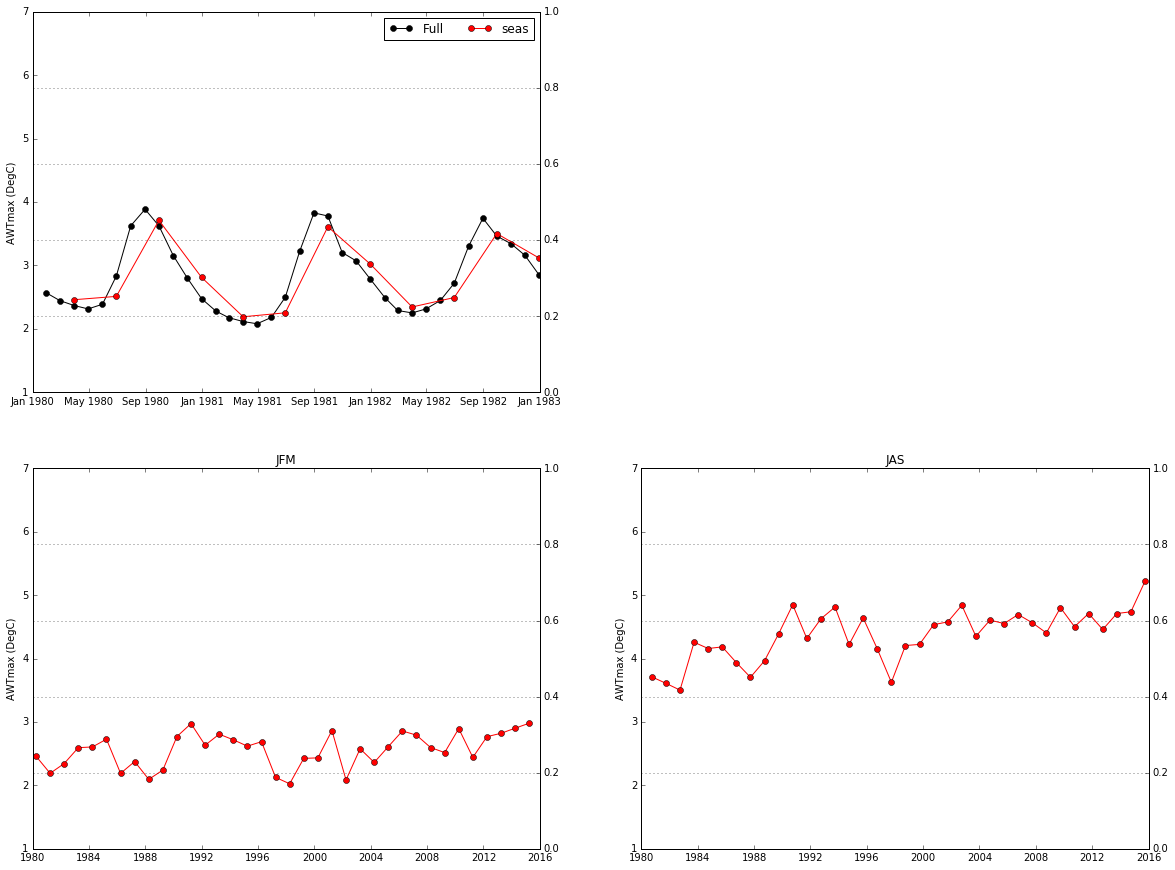

In [13]:
# Quick check  
plt.figure(figsize=(20,15))

ax=plt.subplot(221) ; ax2=plt.twinx()
ax.plot(ds_read['time'],ds_read['Ref_AWTmax_FraWSC_meanTiSe'],'k-o', label='Full')
ax.plot(dt_SEAS['Ref_AWTmax_FraWSC_meanTiSe'],'r-o',label='seas')

ax.set_ylabel(r'AWTmax (DegC)')
ax.set_ylim([1.,7.])
#ax.set_xlim(str(s_year),str(e_year+1))
ax.set_xlim('1980','1983')
ax.legend(ncol=2,loc='upper right')
plt.grid(True)


ax=plt.subplot(223) ; ax2=plt.twinx()
ax.plot(dt_JFM['Ref_AWTmax_FraWSC_meanTiSe'],'r-o')
ax.set_ylabel(r'AWTmax (DegC)')
ax.set_ylim([1.,7.])
plt.title('JFM')
ax.set_xlim(str(s_year),str(e_year+1))
#ax.set_xlim('1980','1983')
plt.grid(True)

ax=plt.subplot(224) ; ax2=plt.twinx()
ax.plot(dt_JAS['Ref_AWTmax_FraWSC_meanTiSe'],'r-o')
ax.set_ylabel(r'AWTmax (DegC)')
ax.set_ylim([1.,7.])
plt.title('JAS')

ax.set_xlim(str(s_year),str(e_year+1))
#ax.set_xlim('1980','1983')
plt.grid(True)


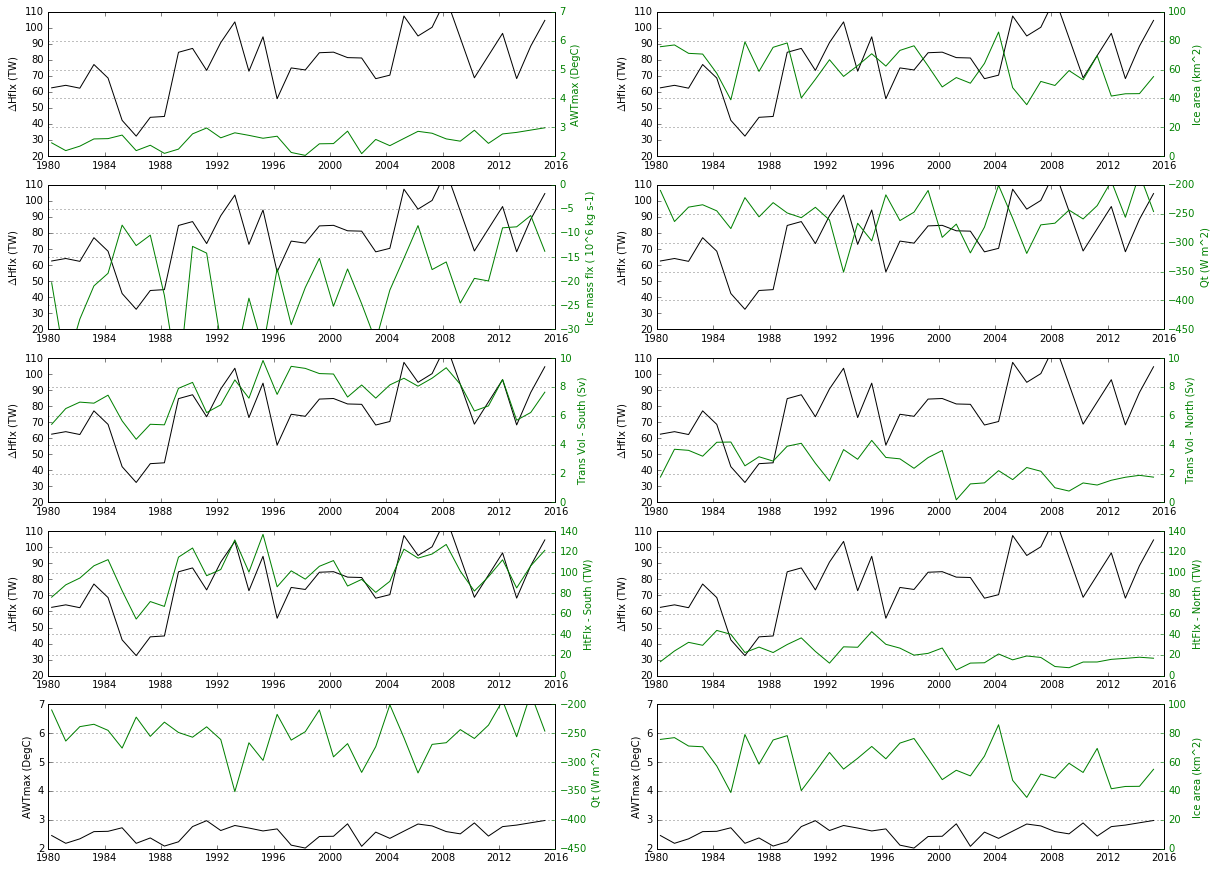

In [14]:
# Select one seasonal period
my_SEAS=dt_JFM  ; str_SEAS='JFM'
#my_SEAS=dt_JAS  ; str_SEAS='JAS'

# Plot the ∆Hflx curve with all ohters 

plt.figure(figsize=(20,15))

ax=plt.subplot(521) ; ax2=plt.twinx()
ax.plot(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_SEAS['Ref_AWTmax_FraWSC_meanTiSe'],'g')
ax2.set_ylim([2.,7.])
ax2.set_ylabel(r'AWTmax (DegC)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())
plt.grid(True)

ax=plt.subplot(522) ; ax2=plt.twinx()
ax.plot(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_SEAS['Ref_Icearea_FraWSC_meanTiSe'],'g')
ax2.set_ylim([0.,100.])
ax2.set_ylabel(r'Ice area (km^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(523) ; ax2=plt.twinx()
ax.plot(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_SEAS['Ref_massflx_TiSe_nFraWSC']*1e-6,'g')
ax2.set_ylim([-30.,0.])
ax2.set_ylabel(r'Ice mass flx ( 10^6 kg s-1)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(524) ; ax2=plt.twinx()
ax.plot(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_SEAS['Ref_Qt_FraWSC_meanTiSe'],'g')
if str_SEAS == 'JFM': 
    ax2.set_ylim([-450.,-200.])
else:
    ax2.set_ylim([-100.,100.])
ax2.set_ylabel(r'Qt (W m^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())

ax=plt.subplot(525) ; ax2=plt.twinx()
ax.plot(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_SEAS['Ref_SS_FraWSC_Vol_TiSe'],'g')
ax2.set_ylim([0.,10.])
ax2.set_ylabel(r'Trans Vol - South (Sv)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(526) ; ax2=plt.twinx()
ax.plot(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_SEAS['Ref_XS_FraWSC_Vol_TiSe'],'g')
if str_SEAS == 'JFM': 
    ax2.set_ylim([0.,10.])
else:
    ax2.set_ylim([-10.,10.])
ax2.set_ylabel(r'Trans Vol - North (Sv)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(527) ; ax2=plt.twinx()
ax.plot(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_SEAS['Ref_SS_FraWSC_Hflx_TiSe'],'g')
ax2.set_ylim([0.,140.])
ax2.set_ylabel(r'HtFlx - South (TW)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(528) ; ax2=plt.twinx()
ax.plot(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_SEAS['Ref_XS_FraWSC_Hflx_TiSe'],'g')
if str_SEAS == 'JFM': 
    ax2.set_ylim([0.,140.])
else:
    ax2.set_ylim([-40.,40.])
ax2.set_ylabel(r'HtFlx - North (TW)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())

ax=plt.subplot(529) ; ax2=plt.twinx()
ax.plot(my_SEAS['Ref_AWTmax_FraWSC_meanTiSe'],'k')
ax.set_ylabel(r'AWTmax (DegC)')
ax.set_ylim([2.,7.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_SEAS['Ref_Qt_FraWSC_meanTiSe'],'g')
if str_SEAS == 'JFM': 
    ax2.set_ylim([-450.,-200.])
else:
    ax2.set_ylim([-100.,100.])
ax2.set_ylabel(r'Qt (W m^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(5,2,10) ; ax2=plt.twinx()
ax.plot(my_SEAS['Ref_AWTmax_FraWSC_meanTiSe'],'k')
ax.set_ylabel(r'AWTmax (DegC)')
ax.set_ylim([2.,7.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_SEAS['Ref_Icearea_FraWSC_meanTiSe'],'g')
ax2.set_ylim([0.,100.])
ax2.set_ylabel(r'Ice area (km^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


dosave=False
if dosave: plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_TiSe_LargeFraWSC_'+str_SEAS+'_DHflx_vs_Qt_IceArea_AWTmax_Massflx_ShtFlx_NHFlx.pdf')
dosave=False

In [15]:
# Compute the correlations 
DHflx_QSurnet_Cor=np.corrcoef(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_Qt_FraWSC_meanTiSe'])
DHflx_IceArea_Cor=np.corrcoef(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_Icearea_FraWSC_meanTiSe'])
DHflx_AWTmax_Cor=np.corrcoef(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_AWTmax_FraWSC_meanTiSe'])
DHflx_IceMflx_Cor=np.corrcoef(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_massflx_TiSe_nFraWSC'])
DHflx_SHflx_Cor=np.corrcoef(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_SS_FraWSC_Hflx_TiSe'])
DHflx_NHflx_Cor=np.corrcoef(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_XS_FraWSC_Hflx_TiSe'])

# The follwing correlation computation is just another way to get correlation, but it gives also the p-value
DHflx_QSurnet_CorSci=scipy.stats.pearsonr(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_Qt_FraWSC_meanTiSe'])
DHflx_IceArea_CorSci=scipy.stats.pearsonr(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_Icearea_FraWSC_meanTiSe'])
DHflx_AWTmax_CorSci=scipy.stats.pearsonr(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_AWTmax_FraWSC_meanTiSe'])
DHflx_IceMflx_CorSci=scipy.stats.pearsonr(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_massflx_TiSe_nFraWSC'])
DHflx_SHflx_CorSci=scipy.stats.pearsonr(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_SS_FraWSC_Hflx_TiSe'])
DHflx_NHflx_CorSci=scipy.stats.pearsonr(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_XS_FraWSC_Hflx_TiSe'])

print 'DHflx_QSurnet_CorSci Corr | p-val:', np.round(DHflx_QSurnet_CorSci[0],2),' | ', np.round(DHflx_QSurnet_CorSci[1],4)
print 'DHflx_IceArea_CorSci Corr | p-val:', np.round(DHflx_IceArea_CorSci[0],2),' | ', np.round(DHflx_IceArea_CorSci[1],4)
print 'DHflx_AWTmax_CorSci  Corr | p-val:', np.round(DHflx_AWTmax_CorSci[0],2) ,' | ', np.round(DHflx_AWTmax_CorSci[1],4)
print 'DHflx_IceMflx_CorSci Corr | p-val:', np.round(DHflx_IceMflx_CorSci[0],2),' | ', np.round(DHflx_IceMflx_CorSci[1],4)
print 'DHflx_SHflx_CorSci   Corr | p-val:', np.round(DHflx_SHflx_CorSci[0],2)  ,' | ', np.round(DHflx_SHflx_CorSci[1],4)
print 'DHflx_NHflx_CorSci   Corr | p-val:', np.round(DHflx_NHflx_CorSci[0],2)  ,' | ', np.round(DHflx_NHflx_CorSci[1],4)

# Compute Correlations between the AWTmax variable and others quantities
DAWTmax_Qt_Cor=np.corrcoef(my_SEAS['Ref_AWTmax_FraWSC_meanTiSe'],my_SEAS['Ref_Qt_FraWSC_meanTiSe'])
DAWTmax_IceArea_Cor=np.corrcoef(my_SEAS['Ref_AWTmax_FraWSC_meanTiSe'],my_SEAS['Ref_Icearea_FraWSC_meanTiSe'])

DAWTmax_Qt_CorSci=scipy.stats.pearsonr(my_SEAS['Ref_AWTmax_FraWSC_meanTiSe'],my_SEAS['Ref_Qt_FraWSC_meanTiSe'])
DAWTmax_IceArea_CorSci=scipy.stats.pearsonr(my_SEAS['Ref_AWTmax_FraWSC_meanTiSe'],my_SEAS['Ref_Icearea_FraWSC_meanTiSe'])

print
print 'DAWTmax_Qt_CorSci  Corr | p-val:', np.round(DAWTmax_Qt_CorSci[0],2) ,' | ', np.round(DAWTmax_Qt_CorSci[1],4)
print 'DAWTmax_IceArea_CorSci Corr | p-val:', np.round(DAWTmax_IceArea_CorSci[0],2),' | ', np.round(DAWTmax_IceArea_CorSci[1],4)



DHflx_QSurnet_CorSci Corr | p-val: -0.27  |  0.1105
DHflx_IceArea_CorSci Corr | p-val: -0.38  |  0.0229
DHflx_AWTmax_CorSci  Corr | p-val: 0.39  |  0.0186
DHflx_IceMflx_CorSci Corr | p-val: -0.09  |  0.6061
DHflx_SHflx_CorSci   Corr | p-val: 0.87  |  0.0
DHflx_NHflx_CorSci   Corr | p-val: -0.32  |  0.0611

DAWTmax_Qt_CorSci  Corr | p-val: -0.07  |  0.6838
DAWTmax_IceArea_CorSci Corr | p-val: -0.67  |  0.0


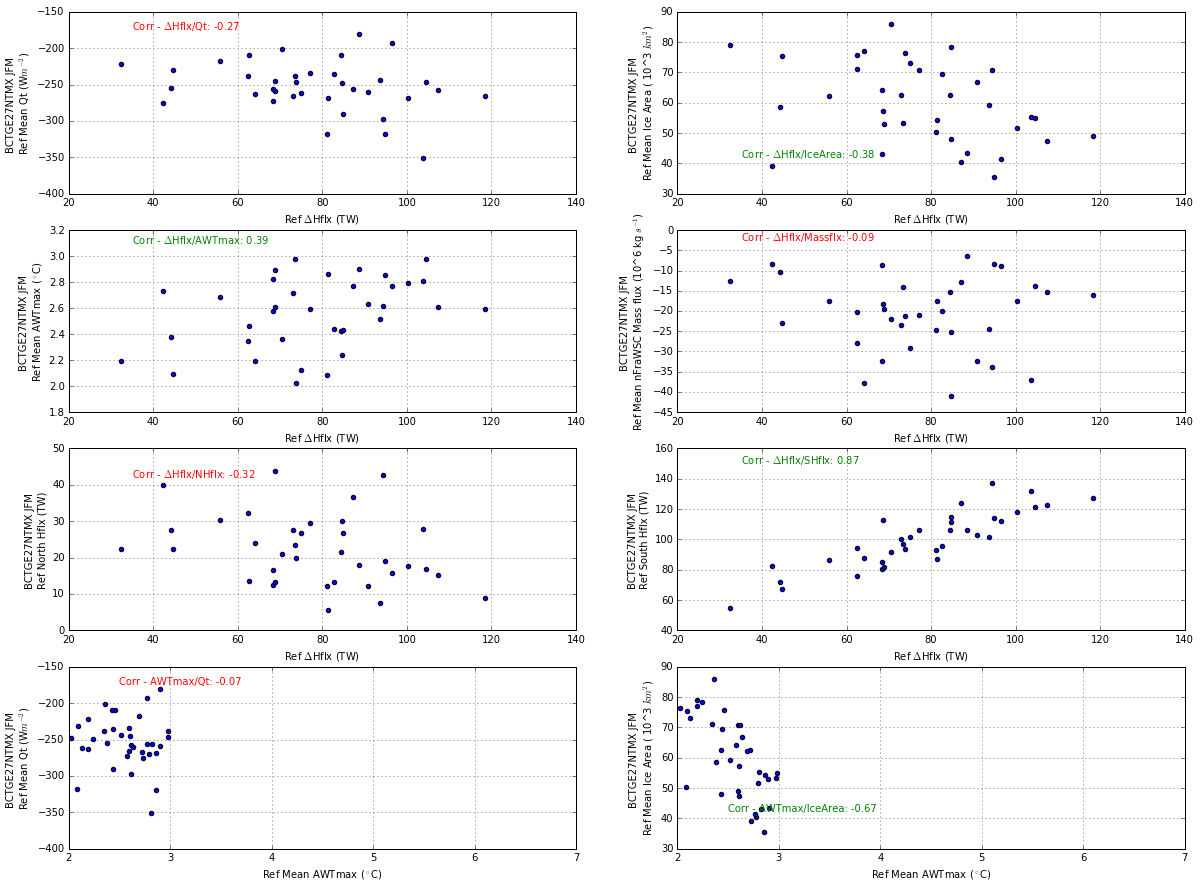

In [16]:
# Scatter plot between ∆Hflx and QSurnet
plt.figure(figsize=(20,15))

# xtext is now the AWTmax temperature in the range 1-7 DegC
if case_Ref == 'BVHNTMXP' : 
    xtext=35.
        
if case_Ref == 'BVHNTMXD' : 
    xtext=35.

if case_Ref == 'BCTGE27NTMX' : 
    xtext=35.
        
plt.subplot(421) 
plt.scatter(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_Qt_FraWSC_meanTiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref Mean Qt (W$m^{-2}$)')
if str_SEAS == 'JFM': 
    if case_Ref == 'BVHNTMXD' :     ytext=-175.
    if case_Ref == 'BVHNTMXP' :     ytext=-225.
    if case_Ref == 'BCTGE27NTMX' :  ytext=-175.
else:
    ytext=35.
plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/Qt: '+str(np.round(DHflx_QSurnet_Cor[1][0],2)),color=pval_test(DHflx_QSurnet_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Icearea
plt.subplot(422) 
plt.scatter(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_Icearea_FraWSC_meanTiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref Mean Ice Area ( 10^3 $km^{2}$)')
if str_SEAS == 'JFM': 
    if case_Ref == 'BVHNTMXD' :     ytext=65.
    if case_Ref == 'BVHNTMXP' :     ytext=42.
    if case_Ref == 'BCTGE27NTMX' :  ytext=42.
else:
    if case_Ref == 'BVHNTMXD' :     ytext=15.
    if case_Ref == 'BVHNTMXP' :     ytext=9.
    if case_Ref == 'BCTGE27NTMX' :  ytext=9.
plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/IceArea: '+str(np.round(DHflx_IceArea_Cor[1][0],2)),color=pval_test(DHflx_IceArea_CorSci[1],ralpha))
plt.grid(True)


# Scatter plot between ∆Hflx and AWTmax
plt.subplot(423) 
plt.scatter(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_AWTmax_FraWSC_meanTiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref Mean AWTmax ($^\circ$C)')
if str_SEAS == 'JFM': 
    ytext=3.1
else:
    if case_Ref == 'BVHNTMXD' :     ytext=5.75
    if case_Ref == 'BVHNTMXP' :     ytext=5.75
    if case_Ref == 'BCTGE27NTMX' :  ytext=6.25
plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/AWTmax: '+str(np.round(DHflx_AWTmax_Cor[1][0],2)),color=pval_test(DHflx_AWTmax_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Massflux
plt.subplot(424) 
plt.scatter(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_massflx_TiSe_nFraWSC']*1e-6)
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref Mean nFraWSC Mass flux (10^6 kg $s^{-1}$)')
if str_SEAS == 'JFM': 
    ytext=-2.5
else:
    ytext=1.
plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/Massflx: '+str(np.round(DHflx_IceMflx_Cor[1][0],2)),color=pval_test(DHflx_IceMflx_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and NHflx
plt.subplot(425) 
plt.scatter(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_XS_FraWSC_Hflx_TiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref North Hflx (TW)')
if str_SEAS == 'JFM': 
    if case_Ref == 'BVHNTMXD' :     ytext=42.
    if case_Ref == 'BVHNTMXP' :     ytext=42.
    if case_Ref == 'BCTGE27NTMX' :  ytext=42.
else:
    if case_Ref == 'BVHNTMXD' :     ytext=22.
    if case_Ref == 'BVHNTMXP' :     ytext=22.
    if case_Ref == 'BCTGE27NTMX' :  ytext=22.
plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/NHflx: '+str(np.round(DHflx_NHflx_Cor[1][0],2)),color=pval_test(DHflx_NHflx_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and SHflx
plt.subplot(426) 
plt.scatter(my_SEAS['Ref_FraWSC_S-X_Hflx_ano'],my_SEAS['Ref_SS_FraWSC_Hflx_TiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref South Hflx (TW)')
if str_SEAS == 'JFM': 
    if case_Ref == 'BVHNTMXD' :     ytext=170.
    if case_Ref == 'BVHNTMXP' :     ytext=150.
    if case_Ref == 'BCTGE27NTMX' :  ytext=150.    
else:
    if case_Ref == 'BVHNTMXD' :     ytext=105.
    if case_Ref == 'BVHNTMXP' :     ytext=105.
    if case_Ref == 'BCTGE27NTMX' :  ytext=105.
plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/SHflx: '+str(np.round(DHflx_SHflx_Cor[1][0],2)),color=pval_test(DHflx_SHflx_CorSci[1],ralpha))
plt.grid(True)


xtext=2.5
# Scatter plot between AWTmax & Qt
plt.subplot(427) 
plt.scatter(my_SEAS['Ref_AWTmax_FraWSC_meanTiSe'],my_SEAS['Ref_Qt_FraWSC_meanTiSe'])
plt.xlabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref Mean Qt (W$m^{-2}$)')
plt.xlim([2.,7.])
if str_SEAS == 'JFM': 
    if case_Ref == 'BVHNTMXD' :     ytext=-175.
    if case_Ref == 'BVHNTMXP' :     ytext=-225.
    if case_Ref == 'BCTGE27NTMX' :  ytext=-175.
else:
    ytext=35.
plt.text(xtext,ytext,r'Corr - AWTmax/Qt: '+str(np.round(DAWTmax_Qt_Cor[1][0],2)),color=pval_test(DAWTmax_Qt_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between AWTmax & Icearea
plt.subplot(428) 
plt.scatter(my_SEAS['Ref_AWTmax_FraWSC_meanTiSe'],my_SEAS['Ref_Icearea_FraWSC_meanTiSe'])
plt.xlabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.xlim([2.,7.])
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref Mean Ice Area ( 10^3 $km^{2}$)')
if str_SEAS == 'JFM': 
    if case_Ref == 'BVHNTMXD' :     ytext=65.
    if case_Ref == 'BVHNTMXP' :     ytext=42.25
    if case_Ref == 'BCTGE27NTMX' :  ytext=42.25
else:
    if case_Ref == 'BVHNTMXD' :     ytext=15.
    if case_Ref == 'BVHNTMXP' :     ytext=9.
    if case_Ref == 'BCTGE27NTMX' :  ytext=9.
        
plt.text(xtext,ytext,r'Corr - AWTmax/IceArea: '+str(np.round(DAWTmax_IceArea_Cor[1][0],2)),color=pval_test(DAWTmax_IceArea_CorSci[1],ralpha))
plt.grid(True)

dosave=False
if dosave : plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_ScatPlot_LargeFraWSC_'+str_SEAS+'_DHflx_vs_Qt_IceArea_AWTmax_Massflx_ShtFlx_NHFlx.pdf')
dosave=False

>>> # Perform exactly the same thing that above but on the smoothed time series

In [142]:
# First transform the dataset into a Pandas dataframe
data_read=ds_read_dt.to_dataframe()
# Apply the rolling mean over 12 months
data_rolmean=data_read.rolling(12,center=True).mean()

In [143]:
data_rolmean[0:9]

,Ref_Qt_FraWSC_meanTiSe,Ref_AWTmax_FraWSC_meanTiSe,Ref_Icearea_FraWSC_meanTiSe,Ref_massflx_TiSe_nFraWSC,Ref_SS_FraWSC_Hflx_TiSe,Ref_XS_FraWSC_Hflx_TiSe,Ref_SS_FraWSC_Vol_TiSe,Ref_XS_FraWSC_Vol_TiSe,Ref_FraWSC_S-X_Hflx_ano
time,,,,,,,,,
1980-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-07-31,-105.236559,2.839181,73.115885,-2.527162e+07,60.001837,16.053807,5.078559,1.924598,43.948030
1980-08-31,-111.458708,2.814406,74.164980,-2.779004e+07,59.386518,15.998704,5.084940,1.931601,43.387814
1980-09-30,-109.554043,2.794963,74.661758,-2.792396e+07,61.998187,16.721080,5.261542,2.040091,45.277107


In [144]:
# To perform seasonal mean JFM, AMJ etc ....
# Notice that the date corresponds to the period end.
# For instance for the JFM period, the corresponding date in end of March  
# It has been checked for the frist 3 months that the corresponding mean was correct
data_rolmean_SEAS=data_rolmean.resample('Q-DEC').mean()
data_rolmean_SEAS


,Ref_Qt_FraWSC_meanTiSe,Ref_AWTmax_FraWSC_meanTiSe,Ref_Icearea_FraWSC_meanTiSe,Ref_massflx_TiSe_nFraWSC,Ref_SS_FraWSC_Hflx_TiSe,Ref_XS_FraWSC_Hflx_TiSe,Ref_SS_FraWSC_Vol_TiSe,Ref_XS_FraWSC_Vol_TiSe,Ref_FraWSC_S-X_Hflx_ano
time,,,,,,,,,
1980-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-09-30,-108.749770,2.816183,73.980874,-2.699520e+07,60.462181,16.257864,5.141680,1.965430,44.204317
1980-12-31,-115.321428,2.781206,77.972023,-3.081449e+07,63.602661,16.906572,5.380360,2.135770,46.696089
1981-03-31,-118.669816,2.749411,80.097420,-3.217644e+07,63.926098,15.256888,5.381781,1.889974,48.669209
1981-06-30,-115.330041,2.771255,79.610225,-2.936347e+07,67.174419,17.484884,5.516817,2.134717,49.689535
1981-09-30,-115.344079,2.829605,75.157154,-2.621462e+07,71.901920,20.167347,5.655443,2.425951,51.734573
1981-12-31,-113.035266,2.857203,69.630261,-2.520615e+07,73.262570,21.627007,5.562388,2.463010,51.635563
1982-03-31,-113.918554,2.903019,64.544571,-2.554844e+07,75.605705,24.358215,5.503666,2.778424,51.247490


In [145]:
# Now select the 2 periods of interest
data_rolmean_JFM=data_rolmean_SEAS[data_rolmean_SEAS.index.month==3]
data_rolmean_JAS=data_rolmean_SEAS[data_rolmean_SEAS.index.month==9]
#data_rolmean_JFM
data_rolmean_JAS

,Ref_Qt_FraWSC_meanTiSe,Ref_AWTmax_FraWSC_meanTiSe,Ref_Icearea_FraWSC_meanTiSe,Ref_massflx_TiSe_nFraWSC,Ref_SS_FraWSC_Hflx_TiSe,Ref_XS_FraWSC_Hflx_TiSe,Ref_SS_FraWSC_Vol_TiSe,Ref_XS_FraWSC_Vol_TiSe,Ref_FraWSC_S-X_Hflx_ano
time,,,,,,,,,
1980-09-30,-108.749770,2.816183,73.980874,-2.699520e+07,60.462181,16.257864,5.141680,1.965430,44.204317
1981-09-30,-115.344079,2.829605,75.157154,-2.621462e+07,71.901920,20.167347,5.655443,2.425951,51.734573
1982-09-30,-117.192988,2.967574,65.542973,-2.426287e+07,77.534488,25.198838,5.334025,2.777189,52.335650
1983-09-30,-139.712158,3.514749,56.900983,-2.133593e+07,95.460480,27.800490,5.548798,2.621529,67.659990
1984-09-30,-119.974588,3.567229,46.414703,-1.048887e+07,91.510966,37.616803,5.543174,3.477336,53.894163
1985-09-30,-144.369924,3.370229,42.601090,-1.111911e+07,68.654988,28.866577,4.274047,2.926334,39.788411
1986-09-30,-111.296948,3.180298,66.055073,-1.561495e+07,68.580133,27.085408,4.758764,2.877241,41.494725
1987-09-30,-109.077247,2.673228,65.755958,-2.000921e+07,63.020064,18.836857,5.247899,2.052568,44.183207
1988-09-30,-114.147470,2.758221,72.883518,-2.812661e+07,67.979631,18.309832,5.823543,2.081288,49.669799


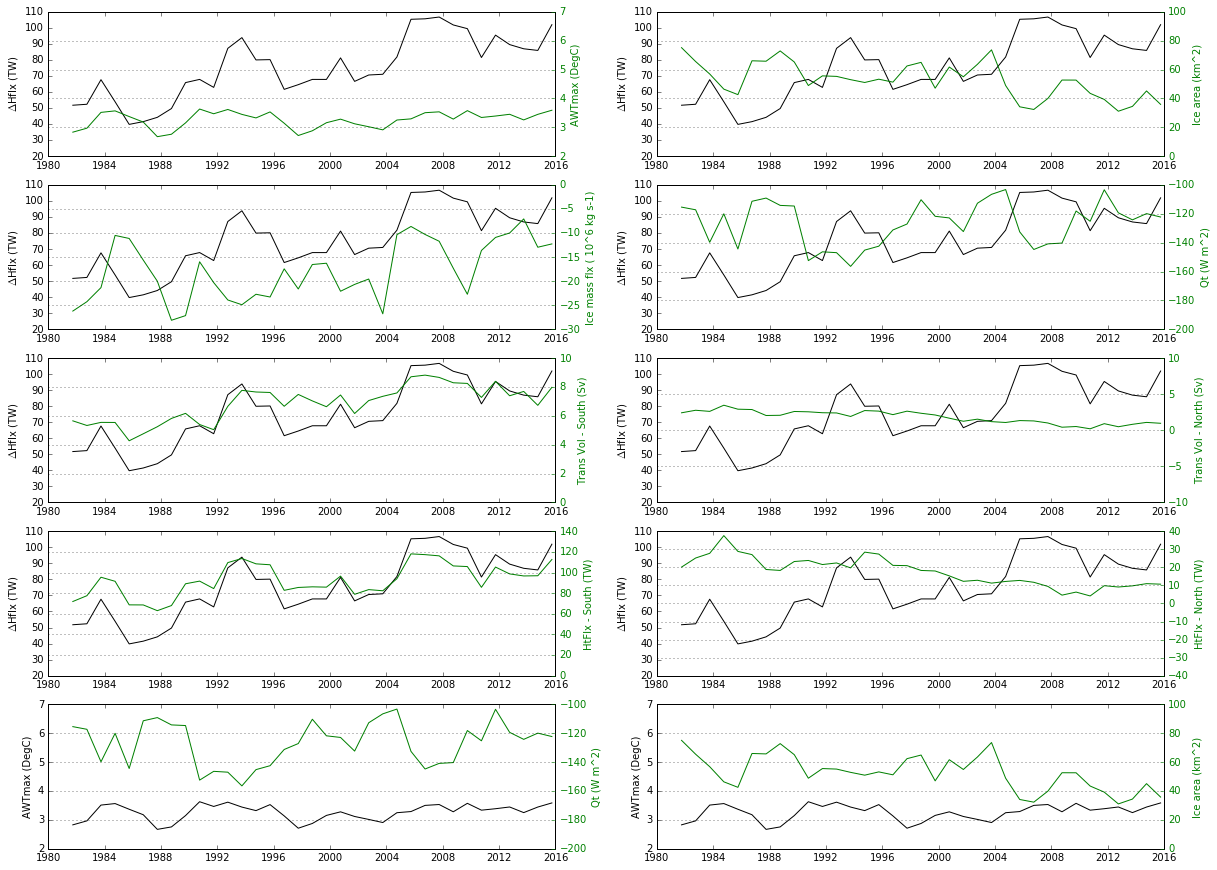

In [159]:
# Select one seasonal period excluding the first year 1980, since the JFM is not avaliable
#my_rollSEAS=data_rolmean_JFM[1::]  ; str_SEAS='JFM'
my_rollSEAS=data_rolmean_JAS[1::]  ; str_SEAS='JAS'

# Plot the ∆Hflx curve with all ohters 

plt.figure(figsize=(20,15))

ax=plt.subplot(521) ; ax2=plt.twinx()
ax.plot(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_rollSEAS['Ref_AWTmax_FraWSC_meanTiSe'],'g')
ax2.set_ylim([2.,7.])
ax2.set_ylabel(r'AWTmax (DegC)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())
plt.grid(True)

ax=plt.subplot(522) ; ax2=plt.twinx()
ax.plot(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_rollSEAS['Ref_Icearea_FraWSC_meanTiSe'],'g')
ax2.set_ylim([0.,100.])
ax2.set_ylabel(r'Ice area (km^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(523) ; ax2=plt.twinx()
ax.plot(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_rollSEAS['Ref_massflx_TiSe_nFraWSC']*1e-6,'g')
ax2.set_ylim([-30.,0.])
ax2.set_ylabel(r'Ice mass flx ( 10^6 kg s-1)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(524) ; ax2=plt.twinx()
ax.plot(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_rollSEAS['Ref_Qt_FraWSC_meanTiSe'],'g')
if str_SEAS == 'JFM': 
    ax2.set_ylim([-200.,-100.])
else:
    ax2.set_ylim([-200.,-100.])
ax2.set_ylabel(r'Qt (W m^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())

ax=plt.subplot(525) ; ax2=plt.twinx()
ax.plot(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_rollSEAS['Ref_SS_FraWSC_Vol_TiSe'],'g')
ax2.set_ylim([0.,10.])
ax2.set_ylabel(r'Trans Vol - South (Sv)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(526) ; ax2=plt.twinx()
ax.plot(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_rollSEAS['Ref_XS_FraWSC_Vol_TiSe'],'g')
if str_SEAS == 'JFM': 
    ax2.set_ylim([0.,10.])
else:
    ax2.set_ylim([-10.,10.])
ax2.set_ylabel(r'Trans Vol - North (Sv)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(527) ; ax2=plt.twinx()
ax.plot(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_rollSEAS['Ref_SS_FraWSC_Hflx_TiSe'],'g')
ax2.set_ylim([0.,140.])
ax2.set_ylabel(r'HtFlx - South (TW)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(528) ; ax2=plt.twinx()
ax.plot(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],'k')
ax.set_ylabel(r'$\Delta$Hflx (TW)')
ax.set_ylim([20.,110.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_rollSEAS['Ref_XS_FraWSC_Hflx_TiSe'],'g')
if str_SEAS == 'JFM': 
    ax2.set_ylim([0.,140.])
else:
    ax2.set_ylim([-40.,40.])
ax2.set_ylabel(r'HtFlx - North (TW)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())

ax=plt.subplot(529) ; ax2=plt.twinx()
ax.plot(my_rollSEAS['Ref_AWTmax_FraWSC_meanTiSe'],'k')
ax.set_ylabel(r'AWTmax (DegC)')
ax.set_ylim([2.,7.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_rollSEAS['Ref_Qt_FraWSC_meanTiSe'],'g')
if str_SEAS == 'JFM': 
    ax2.set_ylim([-200.,-100.])
else:
    ax2.set_ylim([-200.,-100.])
ax2.set_ylabel(r'Qt (W m^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


ax=plt.subplot(5,2,10) ; ax2=plt.twinx()
ax.plot(my_rollSEAS['Ref_AWTmax_FraWSC_meanTiSe'],'k')
ax.set_ylabel(r'AWTmax (DegC)')
ax.set_ylim([2.,7.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(my_rollSEAS['Ref_Icearea_FraWSC_meanTiSe'],'g')
ax2.set_ylim([0.,100.])
ax2.set_ylabel(r'Ice area (km^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_TiSe_LargeFraWSC_'+str_SEAS+'_12mSmooth_DHflx_vs_Qt_IceArea_AWTmax_Massflx_ShtFlx_NHFlx.pdf')

In [160]:
# Compute the correlations 
DHflx_QSurnet_Cor=np.corrcoef(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_Qt_FraWSC_meanTiSe'])
DHflx_IceArea_Cor=np.corrcoef(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_Icearea_FraWSC_meanTiSe'])
DHflx_AWTmax_Cor=np.corrcoef(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_AWTmax_FraWSC_meanTiSe'])
DHflx_IceMflx_Cor=np.corrcoef(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_massflx_TiSe_nFraWSC'])
DHflx_SHflx_Cor=np.corrcoef(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_SS_FraWSC_Hflx_TiSe'])
DHflx_NHflx_Cor=np.corrcoef(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_XS_FraWSC_Hflx_TiSe'])


# The follwing correlation computation is just another way to get correlation, but it gives also the p-value
DHflx_QSurnet_CorSci=scipy.stats.pearsonr(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_Qt_FraWSC_meanTiSe'])
DHflx_IceArea_CorSci=scipy.stats.pearsonr(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_Icearea_FraWSC_meanTiSe'])
DHflx_AWTmax_CorSci=scipy.stats.pearsonr(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_AWTmax_FraWSC_meanTiSe'])
DHflx_IceMflx_CorSci=scipy.stats.pearsonr(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_massflx_TiSe_nFraWSC'])
DHflx_SHflx_CorSci=scipy.stats.pearsonr(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_SS_FraWSC_Hflx_TiSe'])
DHflx_NHflx_CorSci=scipy.stats.pearsonr(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_XS_FraWSC_Hflx_TiSe'])

print 'DHflx_QSurnet_CorSci Corr | p-val:', np.round(DHflx_QSurnet_CorSci[0],2),' | ', np.round(DHflx_QSurnet_CorSci[1],4)
print 'DHflx_IceArea_CorSci Corr | p-val:', np.round(DHflx_IceArea_CorSci[0],2),' | ', np.round(DHflx_IceArea_CorSci[1],4)
print 'DHflx_AWTmax_CorSci  Corr | p-val:', np.round(DHflx_AWTmax_CorSci[0],2) ,' | ', np.round(DHflx_AWTmax_CorSci[1],4)
print 'DHflx_IceMflx_CorSci Corr | p-val:', np.round(DHflx_IceMflx_CorSci[0],2),' | ', np.round(DHflx_IceMflx_CorSci[1],4)
print 'DHflx_SHflx_CorSci   Corr | p-val:', np.round(DHflx_SHflx_CorSci[0],2)  ,' | ', np.round(DHflx_SHflx_CorSci[1],4)
print 'DHflx_NHflx_CorSci   Corr | p-val:', np.round(DHflx_NHflx_CorSci[0],2)  ,' | ', np.round(DHflx_NHflx_CorSci[1],4)


# Compute Correlations between the AWTmax variable and others quantities
DAWTmax_Qt_Cor=np.corrcoef(my_rollSEAS['Ref_AWTmax_FraWSC_meanTiSe'],my_rollSEAS['Ref_Qt_FraWSC_meanTiSe'])
DAWTmax_IceArea_Cor=np.corrcoef(my_rollSEAS['Ref_AWTmax_FraWSC_meanTiSe'],my_rollSEAS['Ref_Icearea_FraWSC_meanTiSe'])

DAWTmax_Qt_CorSci=scipy.stats.pearsonr(my_rollSEAS['Ref_AWTmax_FraWSC_meanTiSe'],my_rollSEAS['Ref_Qt_FraWSC_meanTiSe'])
DAWTmax_IceArea_CorSci=scipy.stats.pearsonr(my_rollSEAS['Ref_AWTmax_FraWSC_meanTiSe'],my_rollSEAS['Ref_Icearea_FraWSC_meanTiSe'])

print
print 'DAWTmax_Qt_CorSci  Corr | p-val:', np.round(DAWTmax_Qt_CorSci[0],2) ,' | ', np.round(DAWTmax_Qt_CorSci[1],4)
print 'DAWTmax_IceArea_CorSci Corr | p-val:', np.round(DAWTmax_IceArea_CorSci[0],2),' | ', np.round(DAWTmax_IceArea_CorSci[1],4)



DHflx_QSurnet_CorSci Corr | p-val: -0.25  |  0.1468
DHflx_IceArea_CorSci Corr | p-val: -0.63  |  0.0001
DHflx_AWTmax_CorSci  Corr | p-val: 0.55  |  0.0006
DHflx_IceMflx_CorSci Corr | p-val: 0.35  |  0.0415
DHflx_SHflx_CorSci   Corr | p-val: 0.92  |  0.0
DHflx_NHflx_CorSci   Corr | p-val: -0.65  |  0.0

DAWTmax_Qt_CorSci  Corr | p-val: -0.55  |  0.0007
DAWTmax_IceArea_CorSci Corr | p-val: -0.68  |  0.0


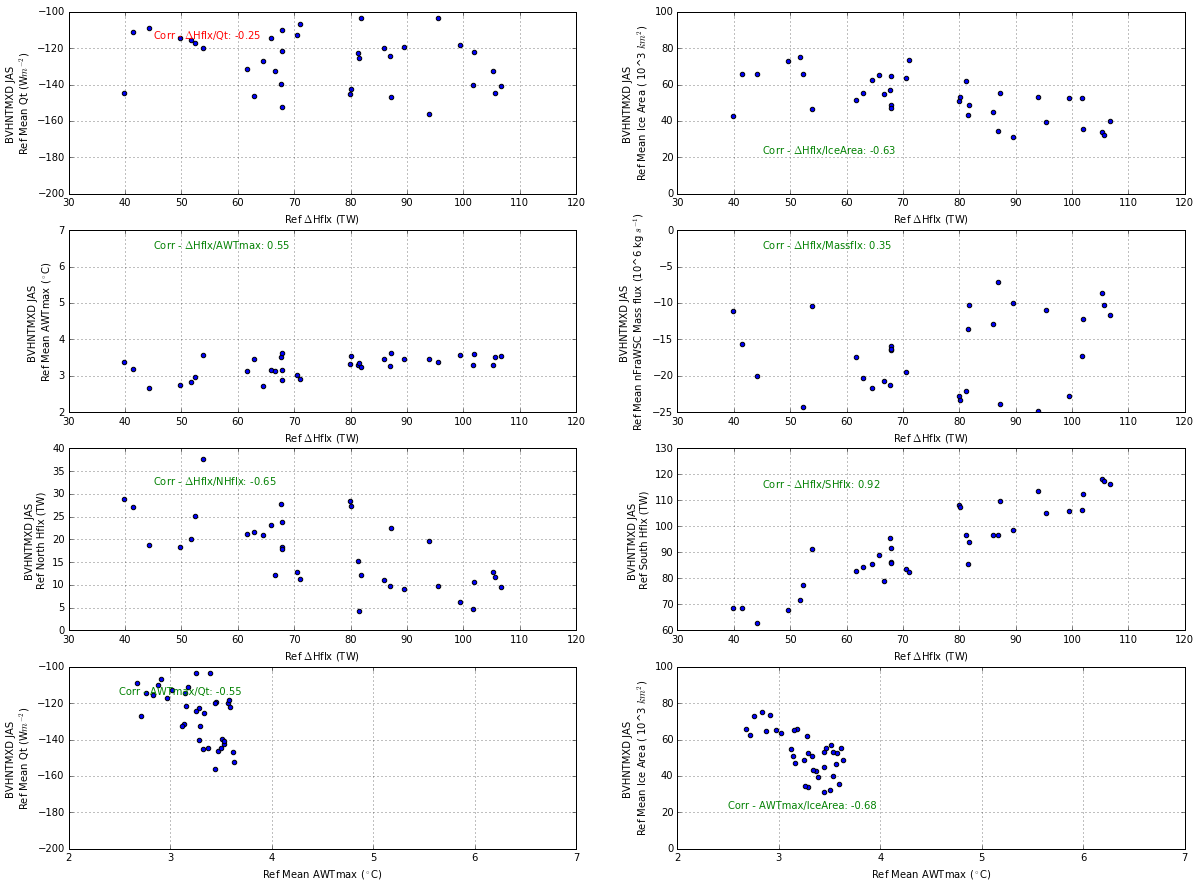

In [161]:
# Scatter plot between ∆Hflx and QSurnet
plt.figure(figsize=(20,15))

# xtext is now the AWTmax temperature in the range 1-7 DegC
if case_Ref == 'BVHNTMXP' : 
    xtext=35.
        
if case_Ref == 'BVHNTMXD' : 
    xtext=45.

if case_Ref == 'BCTGE27NTMX' : 
    if str_SEAS == 'JFM': 
        xtext=35.
    else:
        xtext=45.
        
plt.subplot(421) 
plt.scatter(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_Qt_FraWSC_meanTiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref Mean Qt (W$m^{-2}$)')
plt.ylim([-200.,-100.])
if str_SEAS == 'JFM': 
    if case_Ref == 'BVHNTMXD' :     ytext=-115.
    if case_Ref == 'BVHNTMXP' :     ytext=-115.
    if case_Ref == 'BCTGE27NTMX' :  ytext=-115.
else:
    if case_Ref == 'BVHNTMXD' :     ytext=-115.
    if case_Ref == 'BVHNTMXP' :     ytext=-115.
    if case_Ref == 'BCTGE27NTMX' :  ytext=-115.
plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/Qt: '+str(np.round(DHflx_QSurnet_Cor[1][0],2)),color=pval_test(DHflx_QSurnet_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Icearea
plt.subplot(422) 
plt.scatter(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_Icearea_FraWSC_meanTiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref Mean Ice Area ( 10^3 $km^{2}$)')
plt.ylim([0.,100.])
if str_SEAS == 'JFM': 
    if case_Ref == 'BVHNTMXD' :     ytext=22.
    if case_Ref == 'BVHNTMXP' :     ytext=22.
    if case_Ref == 'BCTGE27NTMX' :  ytext=22.
else:
    if case_Ref == 'BVHNTMXD' :     ytext=22.
    if case_Ref == 'BVHNTMXP' :     ytext=22.
    if case_Ref == 'BCTGE27NTMX' :  ytext=22.
plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/IceArea: '+str(np.round(DHflx_IceArea_Cor[1][0],2)),color=pval_test(DHflx_IceArea_CorSci[1],ralpha))
plt.grid(True)


# Scatter plot between ∆Hflx and AWTmax
plt.subplot(423) 
plt.scatter(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_AWTmax_FraWSC_meanTiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref Mean AWTmax ($^\circ$C)')
plt.ylim([2.,7.])
if str_SEAS == 'JFM': 
    ytext=6.5
else:
    ytext=6.5

plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/AWTmax: '+str(np.round(DHflx_AWTmax_Cor[1][0],2)),color=pval_test(DHflx_AWTmax_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Massflux
plt.subplot(424) 
plt.scatter(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_massflx_TiSe_nFraWSC']*1e-6)
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref Mean nFraWSC Mass flux (10^6 kg $s^{-1}$)')
plt.ylim([-25.,0.])
if str_SEAS == 'JFM': 
    ytext=-2.5
else:
    ytext=-2.5
plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/Massflx: '+str(np.round(DHflx_IceMflx_Cor[1][0],2)),color=pval_test(DHflx_IceMflx_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and NHflx
plt.subplot(425) 
plt.scatter(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_XS_FraWSC_Hflx_TiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref North Hflx (TW)')
if str_SEAS == 'JFM': 
    if case_Ref == 'BVHNTMXD' :     ytext=32.
    if case_Ref == 'BVHNTMXP' :     ytext=32.
    if case_Ref == 'BCTGE27NTMX' :  ytext=32.
else:
    if case_Ref == 'BVHNTMXD' :     ytext=32.
    if case_Ref == 'BVHNTMXP' :     ytext=32.
    if case_Ref == 'BCTGE27NTMX' :  ytext=32.
plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/NHflx: '+str(np.round(DHflx_NHflx_Cor[1][0],2)),color=pval_test(DHflx_NHflx_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and SHflx
plt.subplot(426) 
plt.scatter(my_rollSEAS['Ref_FraWSC_S-X_Hflx_ano'],my_rollSEAS['Ref_SS_FraWSC_Hflx_TiSe'])
plt.xlabel(r'Ref $\Delta$Hflx (TW)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref South Hflx (TW)')
if str_SEAS == 'JFM': 
    if case_Ref == 'BVHNTMXD' :     ytext=115.
    if case_Ref == 'BVHNTMXP' :     ytext=115.
    if case_Ref == 'BCTGE27NTMX' :  ytext=115.    
else:
    if case_Ref == 'BVHNTMXD' :     ytext=115.
    if case_Ref == 'BVHNTMXP' :     ytext=115.
    if case_Ref == 'BCTGE27NTMX' :  ytext=115.
plt.text(xtext,ytext,r'Corr - $\Delta$Hflx/SHflx: '+str(np.round(DHflx_SHflx_Cor[1][0],2)),color=pval_test(DHflx_SHflx_CorSci[1],ralpha))
plt.grid(True)


xtext=2.5
# Scatter plot between AWTmax & Qt
plt.subplot(427) 
plt.scatter(my_rollSEAS['Ref_AWTmax_FraWSC_meanTiSe'],my_rollSEAS['Ref_Qt_FraWSC_meanTiSe'])
plt.xlabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref Mean Qt (W$m^{-2}$)')
plt.xlim([2.,7.])
plt.ylim([-200.,-100.])

if str_SEAS == 'JFM': 
    if case_Ref == 'BVHNTMXD' :     ytext=-115.
    if case_Ref == 'BVHNTMXP' :     ytext=-115.
    if case_Ref == 'BCTGE27NTMX' :  ytext=-115.
else:
    if case_Ref == 'BVHNTMXD' :     ytext=-115.
    if case_Ref == 'BVHNTMXP' :     ytext=-115.
    if case_Ref == 'BCTGE27NTMX' :  ytext=-115.
plt.text(xtext,ytext,r'Corr - AWTmax/Qt: '+str(np.round(DAWTmax_Qt_Cor[1][0],2)),color=pval_test(DAWTmax_Qt_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between AWTmax & Icearea
plt.subplot(428) 
plt.scatter(my_rollSEAS['Ref_AWTmax_FraWSC_meanTiSe'],my_rollSEAS['Ref_Icearea_FraWSC_meanTiSe'])
plt.xlabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.xlim([2.,7.])
plt.ylim([0.,100.])

plt.ylabel(case_Ref+' '+str_SEAS+' \n'+r'Ref Mean Ice Area ( 10^3 $km^{2}$)')
if str_SEAS == 'JFM': 
    if case_Ref == 'BVHNTMXD' :     ytext=22.
    if case_Ref == 'BVHNTMXP' :     ytext=22.
    if case_Ref == 'BCTGE27NTMX' :  ytext=22.
else:
    if case_Ref == 'BVHNTMXD' :     ytext=22.
    if case_Ref == 'BVHNTMXP' :     ytext=22.
    if case_Ref == 'BCTGE27NTMX' :  ytext=22.
        
plt.text(xtext,ytext,r'Corr - AWTmax/IceArea: '+str(np.round(DAWTmax_IceArea_Cor[1][0],2)),color=pval_test(DAWTmax_IceArea_CorSci[1],ralpha))
plt.grid(True)

plt.savefig('./FIGURES/'+case_Ref+'_y'+RYEAR+'_ScatPlot_LargeFraWSC_'+str_SEAS+'_12mSmooth_DHflx_vs_Qt_IceArea_AWTmax_Massflx_ShtFlx_NHFlx.pdf')

>>>> ## Explore new correlation AWTmax with Qt & Ice Area 

In [149]:
DHflx_QSurnet_Cor=np.corrcoef(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_Qt_FraWSC_meanTiSe'])
DHflx_IceArea_Cor=np.corrcoef(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_Icearea_FraWSC_meanTiSe'])
DHflx_AWTmax_Cor=np.corrcoef(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_AWTmax_FraWSC_meanTiSe'])
DHflx_IceMflx_Cor=np.corrcoef(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_massflx_TiSe_nFraWSC'])

# The follwing correlation computation is just another way to get correlation, but it gives also the p-value
DHflx_QSurnet_CorSci=scipy.stats.pearsonr(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_Qt_FraWSC_meanTiSe'])
DHflx_IceArea_CorSci=scipy.stats.pearsonr(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_Icearea_FraWSC_meanTiSe'])
DHflx_AWTmax_CorSci=scipy.stats.pearsonr(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_AWTmax_FraWSC_meanTiSe'])
DHflx_IceMflx_CorSci=scipy.stats.pearsonr(ds_read['Ref_FraWSC_S-X_Hflx_ano'],ds_read['Ref_massflx_TiSe_nFraWSC'])

print 'DHflx_QSurnet_CorSci Corr | p-val:', np.round(DHflx_QSurnet_CorSci[0],2),' | ', np.round(DHflx_QSurnet_CorSci[1],4)
print 'DHflx_IceArea_CorSci Corr | p-val:', np.round(DHflx_IceArea_CorSci[0],2),' | ', np.round(DHflx_IceArea_CorSci[1],4)
print 'DHflx_AWTmax_CorSci  Corr | p-val:', np.round(DHflx_AWTmax_CorSci[0],2) ,' | ', np.round(DHflx_AWTmax_CorSci[1],4)
print 'DHflx_IceMflx_CorSci Corr | p-val:', np.round(DHflx_IceMflx_CorSci[0],2),' | ', np.round(DHflx_IceMflx_CorSci[1],4)

# Compute Correlations between the AWTmax variable and others quantities
DAWTmax_Qt_Cor=np.corrcoef(ds_read['Ref_AWTmax_FraWSC_meanTiSe'],ds_read['Ref_Qt_FraWSC_meanTiSe'])
DAWTmax_IceArea_Cor=np.corrcoef(ds_read['Ref_AWTmax_FraWSC_meanTiSe'],ds_read['Ref_Icearea_FraWSC_meanTiSe'])

DAWTmax_Qt_CorSci=scipy.stats.pearsonr(ds_read['Ref_AWTmax_FraWSC_meanTiSe'],ds_read['Ref_Qt_FraWSC_meanTiSe'])
DAWTmax_IceArea_CorSci=scipy.stats.pearsonr(ds_read['Ref_AWTmax_FraWSC_meanTiSe'],ds_read['Ref_Icearea_FraWSC_meanTiSe'])

print
print 'DAWTmax_Qt_CorSci  Corr | p-val:', np.round(DAWTmax_Qt_CorSci[0],2) ,' | ', np.round(DAWTmax_Qt_CorSci[1],4)
print 'DAWTmax_IceArea_CorSci Corr | p-val:', np.round(DAWTmax_IceArea_CorSci[0],2),' | ', np.round(DAWTmax_IceArea_CorSci[1],4)



DHflx_QSurnet_CorSci Corr | p-val: -0.27  |  0.0
DHflx_IceArea_CorSci Corr | p-val: -0.34  |  0.0
DHflx_AWTmax_CorSci  Corr | p-val: 0.12  |  0.0118
DHflx_IceMflx_CorSci Corr | p-val: 0.08  |  0.1012

DAWTmax_Qt_CorSci  Corr | p-val: 0.39  |  0.0
DAWTmax_IceArea_CorSci Corr | p-val: -0.72  |  0.0


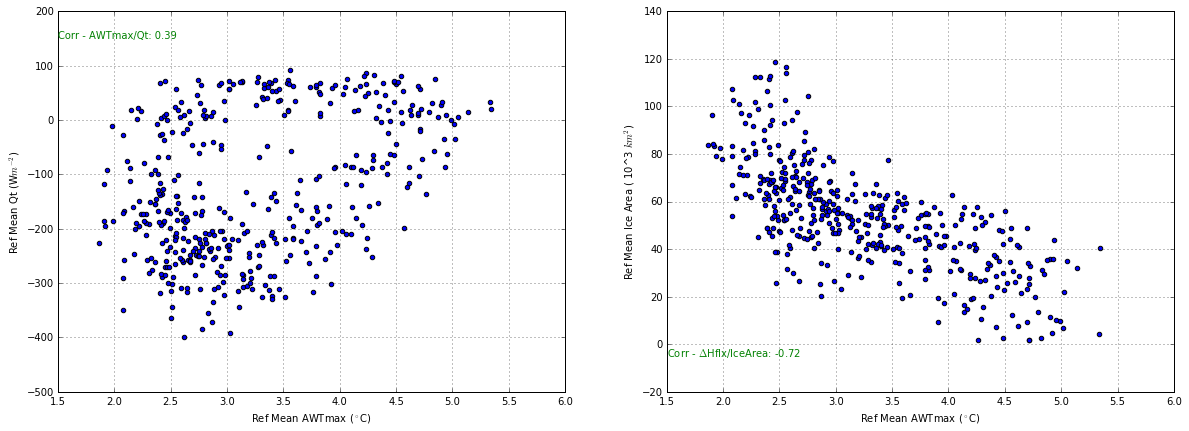

In [150]:
# Scatter plot between ∆Hflx and QSurnet
plt.figure(figsize=(20,15))

# xtext is now the AWTmax temperature in the range 1-7 DegC
if case_Ref == 'BVHNTMXP' : 
    xtext=1.5
    if s_year == 1960 :  xtext=20. 
        
if case_Ref == 'BVHNTMXD' : 
    xtext=1.5
    if s_year == 1960 : xtext=45.

if case_Ref == 'BCTGE27NTMX' : 
    xtext=1.5
    if s_year == 1960 : xtext=1.5
        
if case_Ref == 'BCTGR273' : 
    if s_year == 1960 : xtext=10.

plt.subplot(221) 
plt.scatter(ds_read['Ref_AWTmax_FraWSC_meanTiSe'],ds_read['Ref_Qt_FraWSC_meanTiSe'])
plt.xlabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.ylabel(r'Ref Mean Qt (W$m^{-2}$)')
plt.text(xtext,150.,r'Corr - AWTmax/Qt: '+str(np.round(DAWTmax_Qt_Cor[1][0],2)),color=pval_test(DAWTmax_Qt_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Icearea
plt.subplot(222) 
plt.scatter(ds_read['Ref_AWTmax_FraWSC_meanTiSe'],ds_read['Ref_Icearea_FraWSC_meanTiSe'])
plt.xlabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.ylabel(r'Ref Mean Ice Area ( 10^3 $km^{2}$)')

plt.text(xtext,-5.,r'Corr - $\Delta$Hflx/IceArea: '+str(np.round(DAWTmax_IceArea_Cor[1][0],2)),color=pval_test(DAWTmax_IceArea_CorSci[1],ralpha))
plt.grid(True)

In [151]:
ds_read

<xarray.Dataset>
Dimensions:                      (time: 432)
Coordinates:
  * time                         (time) datetime64[ns] 1980-01-31 ... 2015-12-31
Data variables:
    Ref_Qt_FraWSC_meanTiSe       (time) float64 -214.3 -214.0 ... -243.1 -299.1
    Ref_AWTmax_FraWSC_meanTiSe   (time) float64 2.717 2.543 ... 3.703 3.205
    Ref_Icearea_FraWSC_meanTiSe  (time) float64 79.77 92.87 ... 43.99 37.07
    Ref_massflx_TiSe_nFraWSC     (time) float64 -2.582e+07 ... -1.549e+07
    Ref_SS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_NS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_XS_FraWSC_Hflx_TiSe      (time) float64 ...
    Ref_SS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_NS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_XS_FraWSC_Vol_TiSe       (time) float64 ...
    Ref_FraWSC_S-N_Hflx_ano      (time) float64 ...
    Ref_FraWSC_S-X_Hflx_ano      (time) float64 54.42 43.9 49.28 ... 117.9 124.4
    Ref_Qtdxdy_FraWSC_meanTiSe   (time) float64 ...

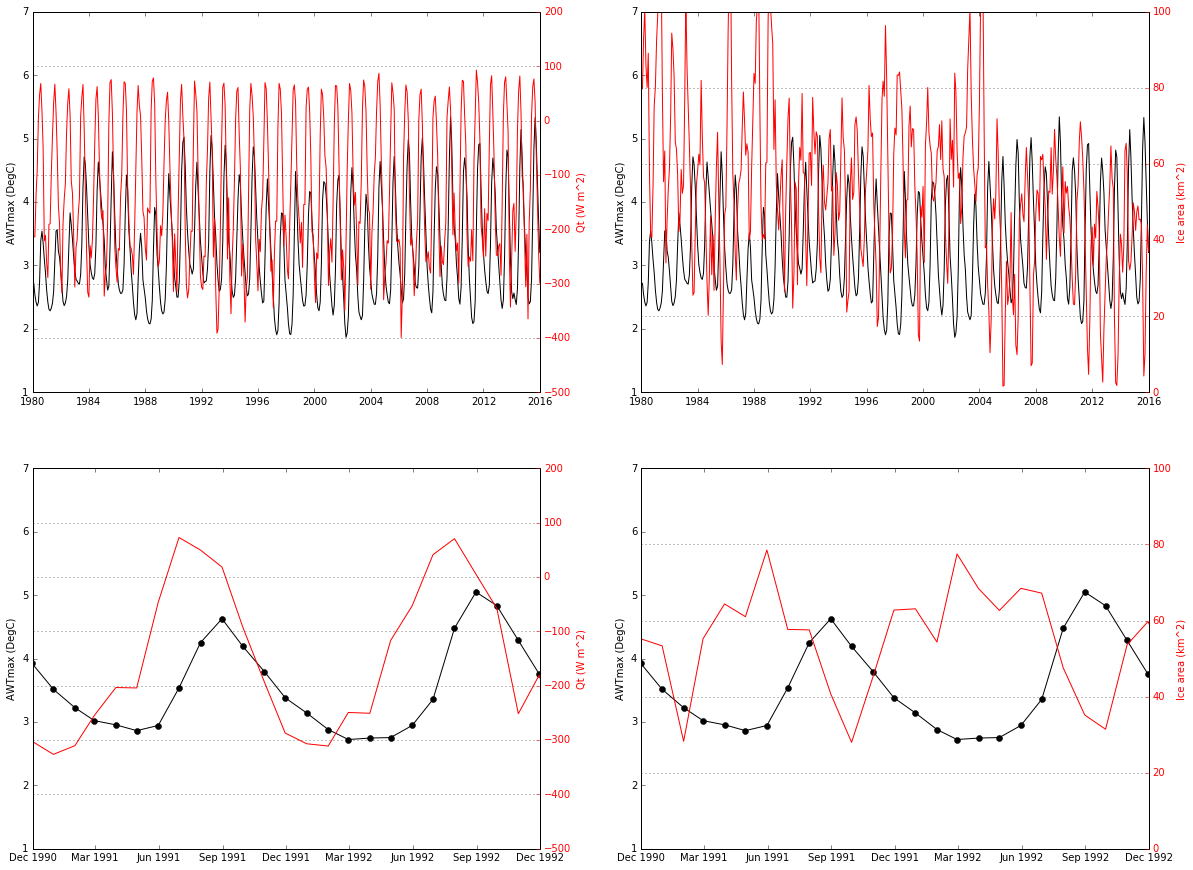

In [152]:

plt.figure(figsize=(20,15))

ax=plt.subplot(221) ; ax2=plt.twinx()
ax.plot(ds_read['time'],ds_read['Ref_AWTmax_FraWSC_meanTiSe'],'k')
ax.set_ylabel(r'AWTmax (DegC)')
ax.set_ylim([1.,7.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],ds_read['Ref_Qt_FraWSC_meanTiSe'],'r')
ax2.set_ylim([-500.,200.])
ax2.set_ylabel(r'Qt (W m^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())
plt.grid(True)

ax=plt.subplot(222) ; ax2=plt.twinx()
ax.plot(ds_read['time'],ds_read['Ref_AWTmax_FraWSC_meanTiSe'],'k')
ax.set_ylabel(r'AWTmax (DegC)')
ax.set_ylim([1.,7.])
ax.set_xlim(str(s_year),str(e_year+1))
plt.grid(True)

col2,=ax2.plot(ds_read['time'],ds_read['Ref_Icearea_FraWSC_meanTiSe'],'r')
ax2.set_ylim([0.,100.])
ax2.set_ylabel(r'Ice area (km^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())




ax=plt.subplot(223) ; ax2=plt.twinx()
ax.plot(ds_read['time'],ds_read['Ref_AWTmax_FraWSC_meanTiSe'],'k-o')
ax.set_ylabel(r'AWTmax (DegC)')
ax.set_ylim([1.,7.])
ax.set_xlim('1990-12','1992-12')
plt.grid(True)

col2,=ax2.plot(ds_read['time'],ds_read['Ref_Qt_FraWSC_meanTiSe'],'r')
ax2.set_ylim([-500.,200.])
ax2.set_ylabel(r'Qt (W m^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())
plt.grid(True)

ax=plt.subplot(224) ; ax2=plt.twinx()
ax.plot(ds_read['time'],ds_read['Ref_AWTmax_FraWSC_meanTiSe'],'k-o')
ax.set_ylabel(r'AWTmax (DegC)')
ax.set_ylim([1.,7.])
ax.set_xlim('1990-12','1992-12')
plt.grid(True)

col2,=ax2.plot(ds_read['time'],ds_read['Ref_Icearea_FraWSC_meanTiSe'],'r')
ax2.set_ylim([0.,100.])
ax2.set_ylabel(r'Ice area (km^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())


plt.savefig('./'+case_Ref+'_y'+RYEAR+'_TiSe_LargeFraWSC_NOSmooth_AWTmax_vs_Qt_IceArea_ShtFlx.pdf')



>> ### Reduce the time window to 1991 - 1992 only to check 

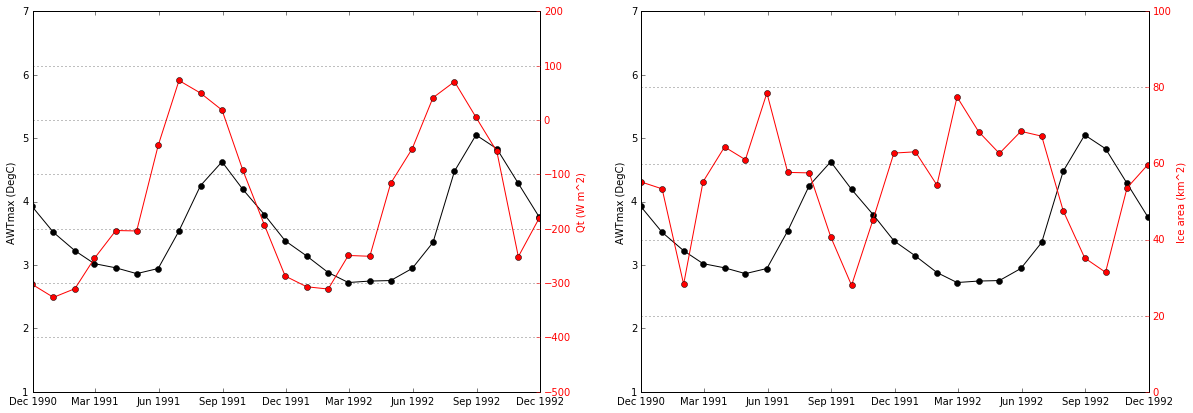

In [153]:
#ds_read
dss_read=xr.Dataset()
dss_read['Ref_AWTmax_FraWSC_meanTiSe_19911992']=ds_read.Ref_AWTmax_FraWSC_meanTiSe.sel(time=slice('1990-11','1992-12'))
dss_read['Ref_Qt_FraWSC_meanTiSe_19911992']=ds_read.Ref_Qt_FraWSC_meanTiSe.sel(time=slice('1990-11','1992-12'))
dss_read['Ref_Icearea_FraWSC_meanTiSe_19911992']=ds_read.Ref_Icearea_FraWSC_meanTiSe.sel(time=slice('1990-11','1992-12'))
dss_read['time']=ds_read.time.sel(time=slice('1990-11','1992-12'))

plt.figure(figsize=(20,15))

ax=plt.subplot(221) ; ax2=plt.twinx()
ax.plot(dss_read['time'],dss_read['Ref_AWTmax_FraWSC_meanTiSe_19911992'],'k-o')
ax.set_ylabel(r'AWTmax (DegC)')
ax.set_ylim([1.,7.])
ax.set_xlim('1990-12','1992-12')
#plt.axvspan('1990-11', '1991-04', facecolor='grey', alpha=0.5)
plt.grid(True)

col2,=ax2.plot(dss_read['time'],dss_read['Ref_Qt_FraWSC_meanTiSe_19911992'],'r-o')
ax2.set_ylim([-500.,200.])
ax2.set_ylabel(r'Qt (W m^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())
plt.grid(True)

ax=plt.subplot(222) ; ax2=plt.twinx()
ax.plot(dss_read['time'],dss_read['Ref_AWTmax_FraWSC_meanTiSe_19911992'],'k-o')
ax.set_ylabel(r'AWTmax (DegC)')
ax.set_ylim([1.,7.])
ax.set_xlim('1990-12','1992-12')
plt.grid(True)

col2,=ax2.plot(dss_read['time'],dss_read['Ref_Icearea_FraWSC_meanTiSe_19911992'],'r-o')
ax2.set_ylim([0.,100.])
ax2.set_ylabel(r'Ice area (km^2)')

ax2.yaxis.label.set_color(col2.get_color())
ax2.tick_params(axis='y', colors=col2.get_color())



In [154]:


# Compute Correlations between the AWTmax variable and others quantities
DAWTmax_Qt_19911992_Cor=np.corrcoef(dss_read['Ref_AWTmax_FraWSC_meanTiSe_19911992'],dss_read['Ref_Qt_FraWSC_meanTiSe_19911992'])
DAWTmax_IceArea_19911992_Cor=np.corrcoef(dss_read['Ref_AWTmax_FraWSC_meanTiSe_19911992'],dss_read['Ref_Icearea_FraWSC_meanTiSe_19911992'])

DAWTmax_Qt_19911992_CorSci=scipy.stats.pearsonr(dss_read['Ref_AWTmax_FraWSC_meanTiSe_19911992'],dss_read['Ref_Qt_FraWSC_meanTiSe_19911992'])
DAWTmax_IceArea_19911992_CorSci=scipy.stats.pearsonr(dss_read['Ref_AWTmax_FraWSC_meanTiSe_19911992'],dss_read['Ref_Icearea_FraWSC_meanTiSe_19911992'])

print dss_read['Ref_AWTmax_FraWSC_meanTiSe_19911992']

<xarray.DataArray 'Ref_AWTmax_FraWSC_meanTiSe_19911992' (time: 26)>
array([3.926548, 3.515226, 3.225335, 3.021212, 2.955064, 2.863727, 2.944283,
       3.537137, 4.251539, 4.627492, 4.192267, 3.795196, 3.381827, 3.14218 ,
       2.880973, 2.723212, 2.746444, 2.754298, 2.945134, 3.355973, 4.479237,
       5.050022, 4.833546, 4.285884, 3.756933, 3.461348])
Coordinates:
  * time     (time) datetime64[ns] 1990-11-30 1990-12-31 ... 1992-12-31
Attributes:
    units:    DegC



DAWTmax_Qt_19911992_CorSci  Corr | p-val: 0.47  |  0.0163
DAWTmax_IceArea_19911992_CorSci Corr | p-val: -0.69  |  0.0001


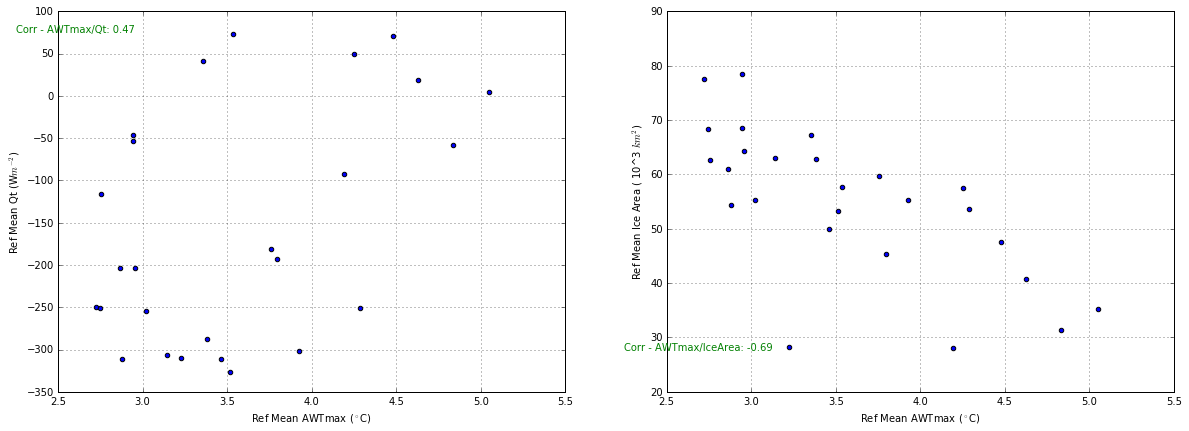

In [155]:
# Scatter plot between ∆Hflx and QSurnet
plt.figure(figsize=(20,15))

# xtext is now the AWTmax temperature in the range 1-7 DegC
if case_Ref == 'BVHNTMXP' : 
    xtext=2.25
    if s_year == 1960 :  xtext=20. 
        
if case_Ref == 'BVHNTMXD' : 
    xtext=2.25
    if s_year == 1960 : xtext=45.

if case_Ref == 'BCTGE27NTMX' : 
    xtext=2.25
    if s_year == 1960 : xtext=1.5
        
if case_Ref == 'BCTGR273' : 
    if s_year == 1960 : xtext=10.

plt.subplot(221) 
plt.scatter(dss_read['Ref_AWTmax_FraWSC_meanTiSe_19911992'],dss_read['Ref_Qt_FraWSC_meanTiSe_19911992'])
plt.xlabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.ylabel(r'Ref Mean Qt (W$m^{-2}$)')
plt.text(xtext,75.,r'Corr - AWTmax/Qt: '+str(np.round(DAWTmax_Qt_19911992_Cor[1][0],2)),color=pval_test(DAWTmax_Qt_19911992_CorSci[1],ralpha))
plt.grid(True)

# Scatter plot between ∆Hflx and Icearea
plt.subplot(222) 
plt.scatter(dss_read['Ref_AWTmax_FraWSC_meanTiSe_19911992'],dss_read['Ref_Icearea_FraWSC_meanTiSe_19911992'])
plt.xlabel(r'Ref Mean AWTmax ($^\circ$C)')
plt.ylabel(r'Ref Mean Ice Area ( 10^3 $km^{2}$)')

plt.text(xtext,27.75,r'Corr - AWTmax/IceArea: '+str(np.round(DAWTmax_IceArea_19911992_Cor[1][0],2)),color=pval_test(DAWTmax_IceArea_19911992_CorSci[1],ralpha))
plt.grid(True)

print
print 'DAWTmax_Qt_19911992_CorSci  Corr | p-val:', np.round(DAWTmax_Qt_19911992_CorSci[0],2) ,' | ', np.round(DAWTmax_Qt_19911992_CorSci[1],4)
print 'DAWTmax_IceArea_19911992_CorSci Corr | p-val:', np.round(DAWTmax_IceArea_19911992_CorSci[0],2),' | ', np.round(DAWTmax_IceArea_19911992_CorSci[1],4)

>>> ## The following lag correlation does not work as expected, to think about  

array([0.68163491, 0.71673911, 0.75738727, 0.77036029, 0.74655465,
       0.76301459, 0.80183765, 0.81175947, 0.82109734, 0.83010046,
       0.83683876, 0.82029849, 0.77758349])

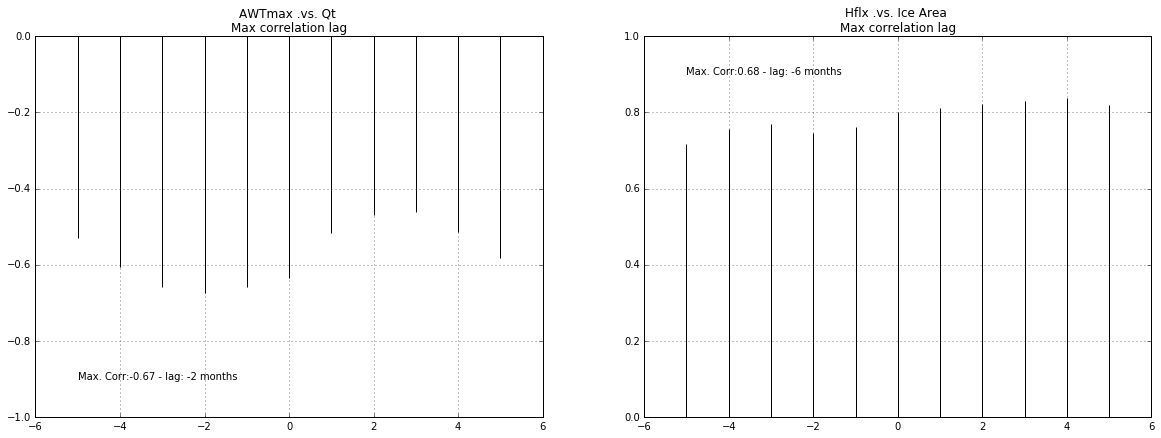

In [108]:
plt.figure(figsize=(20,15))


sel_maxlags=6

plt.subplot(221)
lags_corr=plt.xcorr(dss_read['Ref_AWTmax_FraWSC_meanTiSe_19911992'],dss_read['Ref_Qt_FraWSC_meanTiSe_19911992'],maxlags=sel_maxlags)
AWTQt_lag=lags_corr[0][lags_corr[1][:].argmin()]
AWTQt_Cor=lags_corr[1][:].min()
plt.ylim([-1.,0.])
plt.title('AWTmax .vs. Qt \n'+ 'Max correlation lag')
str_AWTQt_Cor=str(np.round(AWTQt_Cor,2))
str_AWTQt_lag=str(AWTQt_lag)
plt.text(-5.,-0.9,'Max. Corr:'+str_AWTQt_Cor+' - lag: '+str_AWTQt_lag+' months')
plt.grid(True)
lags_corr[0][:] ; lags_corr[1][:]

plt.subplot(222)
lags_corr=plt.xcorr(dss_read['Ref_AWTmax_FraWSC_meanTiSe_19911992'],dss_read['Ref_Icearea_FraWSC_meanTiSe_19911992'],maxlags=sel_maxlags)
AWTIceArea_lag=lags_corr[0][lags_corr[1][:].argmin()]
AWTIceArea_Cor=lags_corr[1][:].min()
plt.ylim([0.,1.])
plt.title('Hflx .vs. Ice Area \n'+ 'Max correlation lag')
str_AWTIceArea_Cor=str(np.round(AWTIceArea_Cor,2))
str_AWTIceArea_lag=str(AWTIceArea_lag)
plt.text(-5.,0.9,'Max. Corr:'+str_AWTIceArea_Cor+' - lag: '+str_AWTIceArea_lag+' months')
plt.grid(True)

lags_corr[0][:] ; lags_corr[1][:]

